In [ ]:
import pandas as pd
import os

###############################################################
# Specify the local file path
file_path = "brake_stopping_distance.csv"
###############################################################
# Load the dataset directly
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Dataset loaded from: {file_path}")

    ###############################################################
    # Display the contents and structure of the dataset
    print("\nContents of the dataset (First 5 rows):")
    print(df.head())

    print("\nDataset Information:")
    print(df.info())
    ###############################################################

else:
    print(f"Error: {file_path} not found.")



Error: brake_stopping_distance.csv not found.


In [ ]:
import os

# Set the path to the current directory (where your file is located)
current_path = os.getcwd()

print(f"Dataset location: {current_path}")
print("Contents of the directory:")

###############################################################
# Updated os.walk logic for the local directory
###############################################################
for root, dirs, files in os.walk(current_path):
    # Only show files in the current directory to keep output clean,
    # or keep the full walk logic as shown below:
    level = root.replace(current_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        # Filter to highlight your specific dataset if desired
        if f == "brake_stopping_distance.csv":
            print(f'{subindent}{f}  <-- Target File')
        else:
            print(f'{subindent}{f}')
###############################################################

Dataset location: /content
Contents of the directory:
content/
    .config/
        default_configs.db
        config_sentinel
        .last_update_check.json
        .last_opt_in_prompt.yaml
        gce
        hidden_gcloud_config_universe_descriptor_data_cache_configs.db
        active_config
        .last_survey_prompt.yaml
        logs/
            2025.12.11/
                14.34.38.212031.log
                14.34.12.303029.log
                14.33.40.102128.log
                14.34.39.029902.log
                14.34.28.289959.log
                14.34.22.298248.log
        configurations/
            config_default
    sample_data/
        README.md
        anscombe.json
        california_housing_train.csv
        mnist_test.csv
        california_housing_test.csv
        mnist_train_small.csv


In [ ]:
import pandas as pd
import numpy as np


np.random.seed(42) # for reproducibility
speeds = np.arange(20, 121, 10)
stopping_distances = np.round(0.006 * speeds**2 + np.random.normal(0, 5, len(speeds)), 1)

dummy_df = pd.DataFrame({
    'Speed_kmh': speeds,
    'Stopping_Distance_m': stopping_distances
})

file_path = 'brake_stopping_distance.csv'



print("First 5 rows of the dummy data:")
print(dummy_df.head())

First 5 rows of the dummy data:
   Speed_kmh  Stopping_Distance_m
0         20                  4.9
1         30                  4.7
2         40                 12.8
3         50                 22.6
4         60                 20.4


In [ ]:
file_path = 'brake_stopping_distance.csv'
dummy_df.to_csv(file_path, index=False)
print(f"dummy_df saved to {file_path}")

dummy_df saved to brake_stopping_distance.csv


In [ ]:
dummy_df. head()

,Speed_kmh,Stopping_Distance_m
0,20,4.9
1,30,4.7
2,40,12.8
3,50,22.6
4,60,20.4


In [ ]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Speed_kmh            11 non-null     int64  
 1   Stopping_Distance_m  11 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 308.0 bytes


In [ ]:
display(dummy_df.describe())

,Speed_kmh,Stopping_Distance_m
count,11.000000,11.000000
mean,70.000000,37.218182
std,33.166248,27.670592
min,20.000000,4.700000
25%,45.000000,16.600000
50%,70.000000,28.200000
75%,95.000000,55.050000
max,120.000000,84.100000


In [ ]:
dummy_df.describe()

,Speed_kmh,Stopping_Distance_m
count,11.000000,11.000000
mean,70.000000,37.218182
std,33.166248,27.670592
min,20.000000,4.700000
25%,45.000000,16.600000
50%,70.000000,28.200000
75%,95.000000,55.050000
max,120.000000,84.100000


In [ ]:
dummy_df['Speed_kmh'].value_counts()

,count
Speed_kmh,
20,1
30,1
40,1
50,1
60,1
70,1
80,1
90,1
100,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

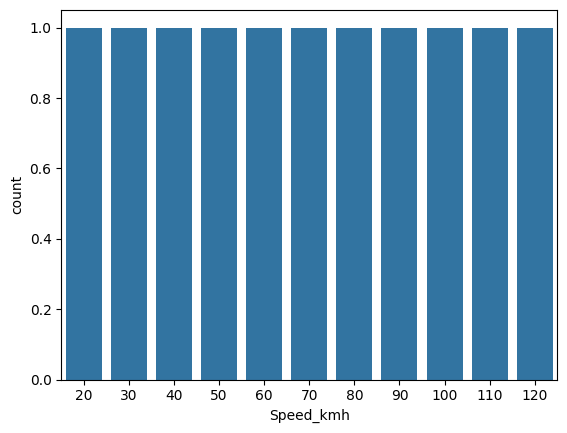

In [ ]:
from typing import Annotated
sns.countplot(x='Speed_kmh', data=dummy_df)
plt.show()

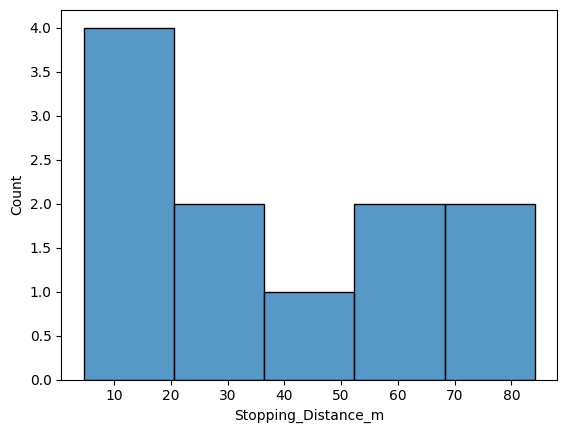

In [ ]:
sns.histplot(df['Stopping_Distance_m'])
plt.show()

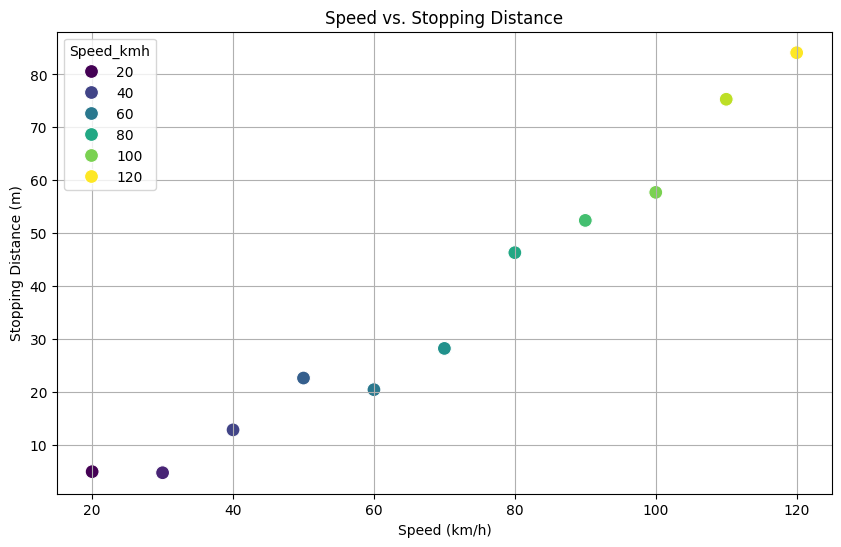

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed_kmh', y='Stopping_Distance_m', data=dummy_df, s=100, hue='Speed_kmh', palette='viridis')
plt.title('Speed vs. Stopping Distance')
plt.xlabel('Speed (km/h)')
plt.ylabel('Stopping Distance (m)')
plt.grid(True)
plt.show()

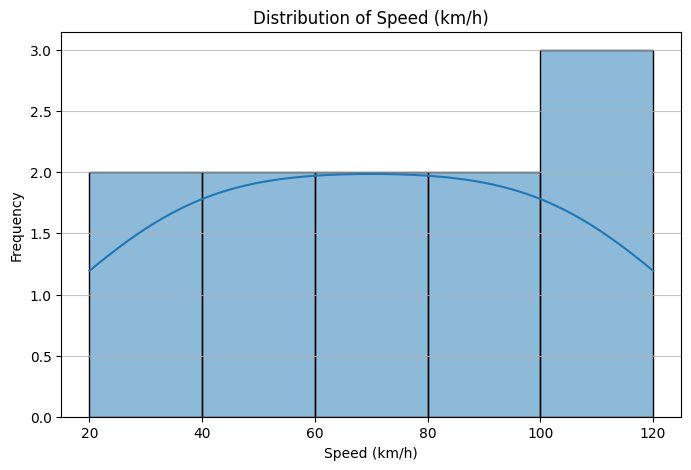

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Speed_kmh'], kde=True)
plt.title('Distribution of Speed (km/h)')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
df.corr(numeric_only=True)

,Speed_kmh,Stopping_Distance_m
Speed_kmh,1.000000,0.979155
Stopping_Distance_m,0.979155,1.000000


In [ ]:
df.corr(numeric_only=True)['Speed_kmh']

,Speed_kmh
Speed_kmh,1.000000
Stopping_Distance_m,0.979155


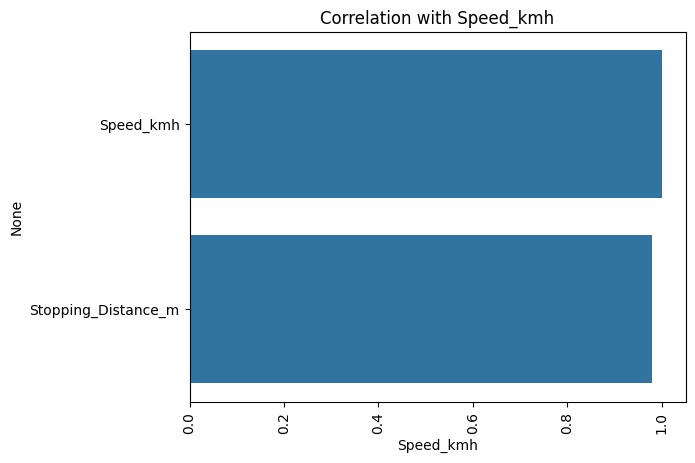

In [ ]:
sns.barplot(x=df.corr(numeric_only=True)['Speed_kmh'],
            y=df.corr(numeric_only=True)['Speed_kmh'].index)
plt.xticks(rotation=90)
plt.title('Correlation with Speed_kmh')
plt.show()

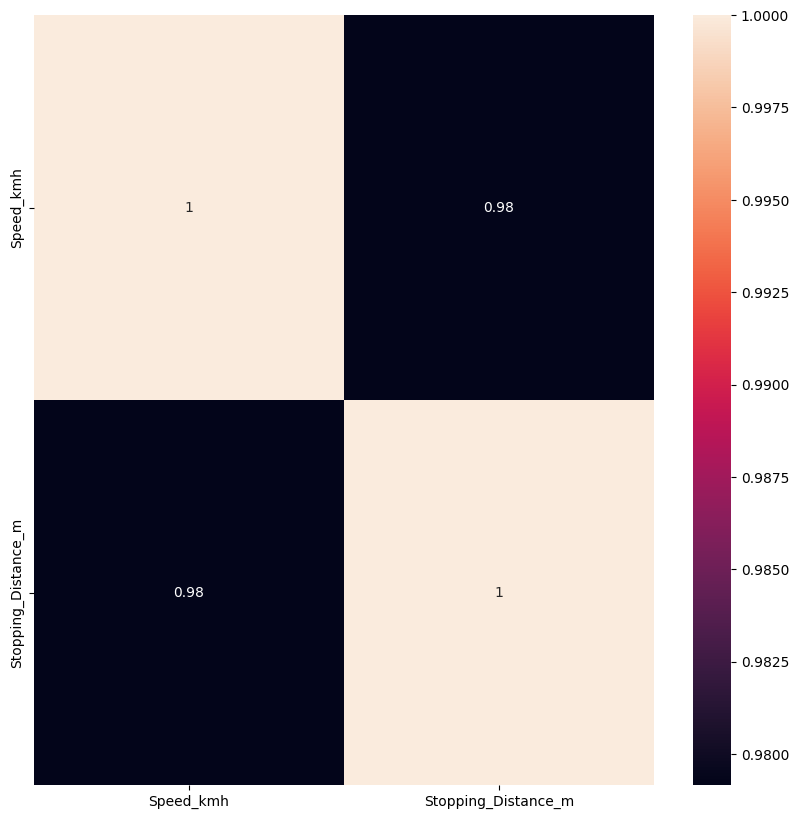

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

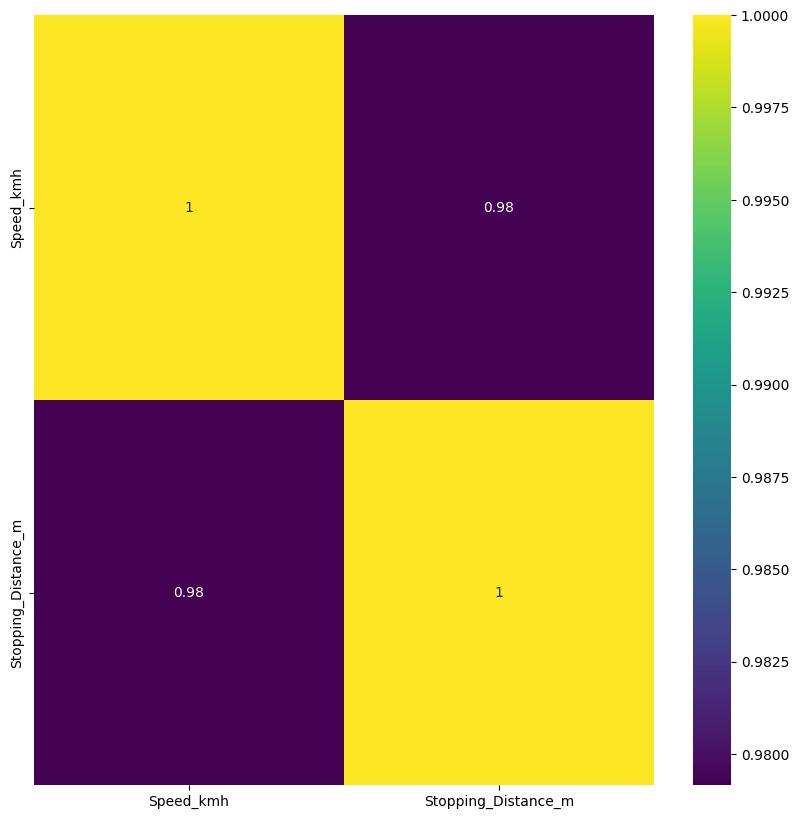

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='viridis' )
plt.show()
